<a href="https://colab.research.google.com/github/RavinduP/Product_Success/blob/Market_demand_forecasting/xgboost_ensemble_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading data...

Dataset shape: (7660, 7)

Missing values:
Billing Date     0
Net Weight       0
Sales Region     0
Invoice Value    0
Material Code    0
Size             0
QTY(EA)          0
dtype: int64

After filtering invalid entries, shape: (7249, 5)

Analyzing outliers in QTY(EA)...
Column QTY(EA) statistics:
- Mean: 4.04
- Median: 1.00
- Std Dev: 10.02
- Min: 1.00
- Max: 173.00
- IQR: 2.00
- Number of outliers: 822 (11.34%)


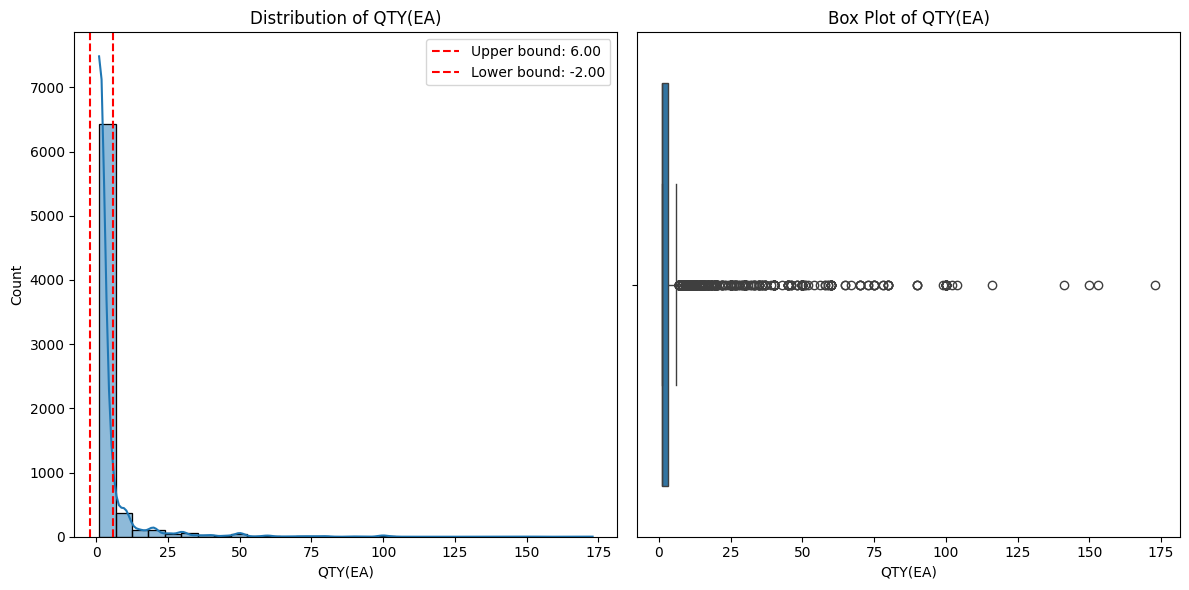


Handling outliers in QTY(EA) using winsorize method...
Winsorized values below 1.00 and above 17.00


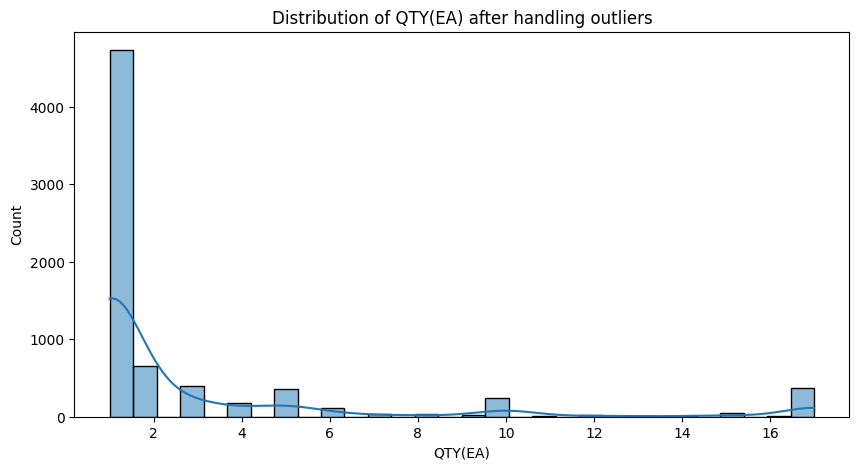


Encoding categorical features...

Engineering advanced features...

Performing feature selection...

Top correlations with target:
QTY(EA)                   1.000000
QTY(EA)ratio_to_mean30    0.795987
QTY(EA)ratio_to_mean14    0.771272
QTY(EA)rolling_sum3       0.748637
QTY(EA)rolling_mean3      0.748637
QTY(EA)ratio_to_mean7     0.715654
QTY(EA)rolling_max3       0.684689
QTY(EA)ratio_to_mean3     0.584353
QTY(EA)rolling_sum7       0.572494
QTY(EA)rolling_mean7      0.572494
Name: QTY(EA), dtype: float64

Features with correlation > 0.8 with target:
[]

Found 49 pairs of highly correlated features (r > 0.8):
- Date and Year: 0.914
- Date and QTY(EA)_expanding_mean: -0.846
- Date and QTY(EA)_expanding_std: -0.814
- Month and Quarter: 0.971
- Month and DayOfYear: 0.996
- Month and WeekOfYear: 0.996
- Month and month_size_interaction: 1.000
- Day and month_day_ratio: 0.999
- Quarter and DayOfYear: 0.967
- Quarter and WeekOfYear: 0.967
... and 39 more pairs

Preparing data for training..

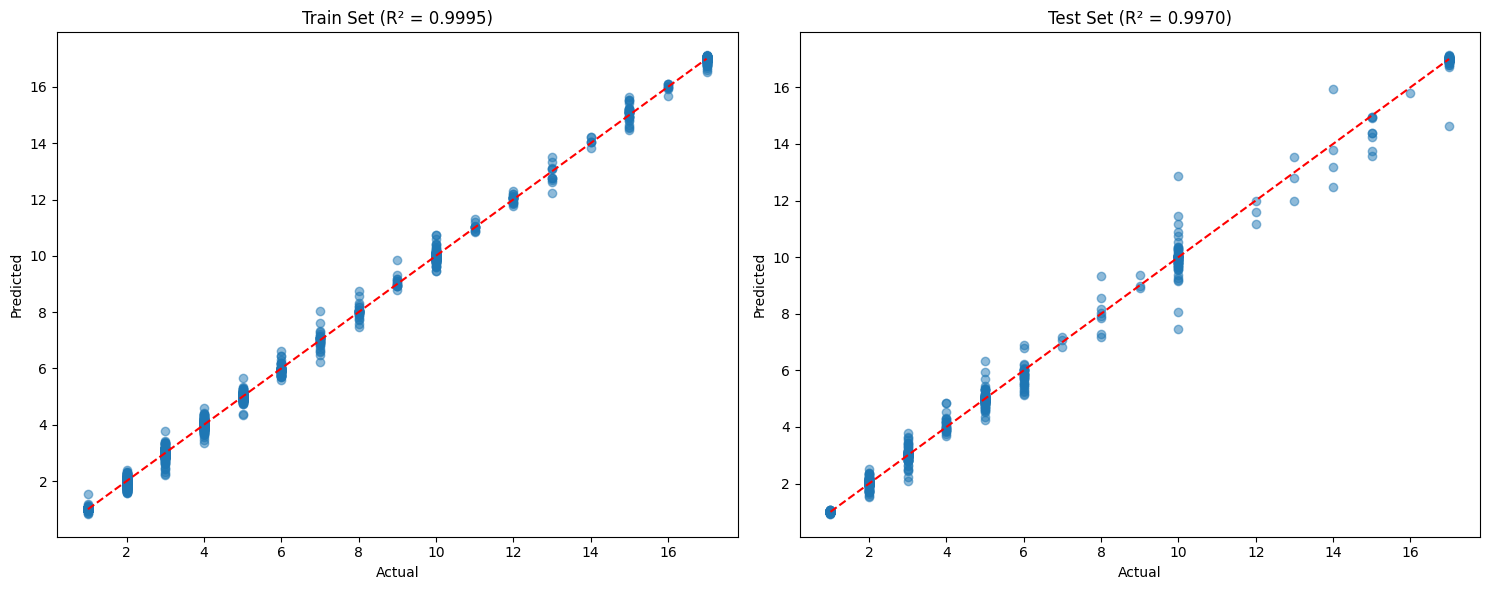

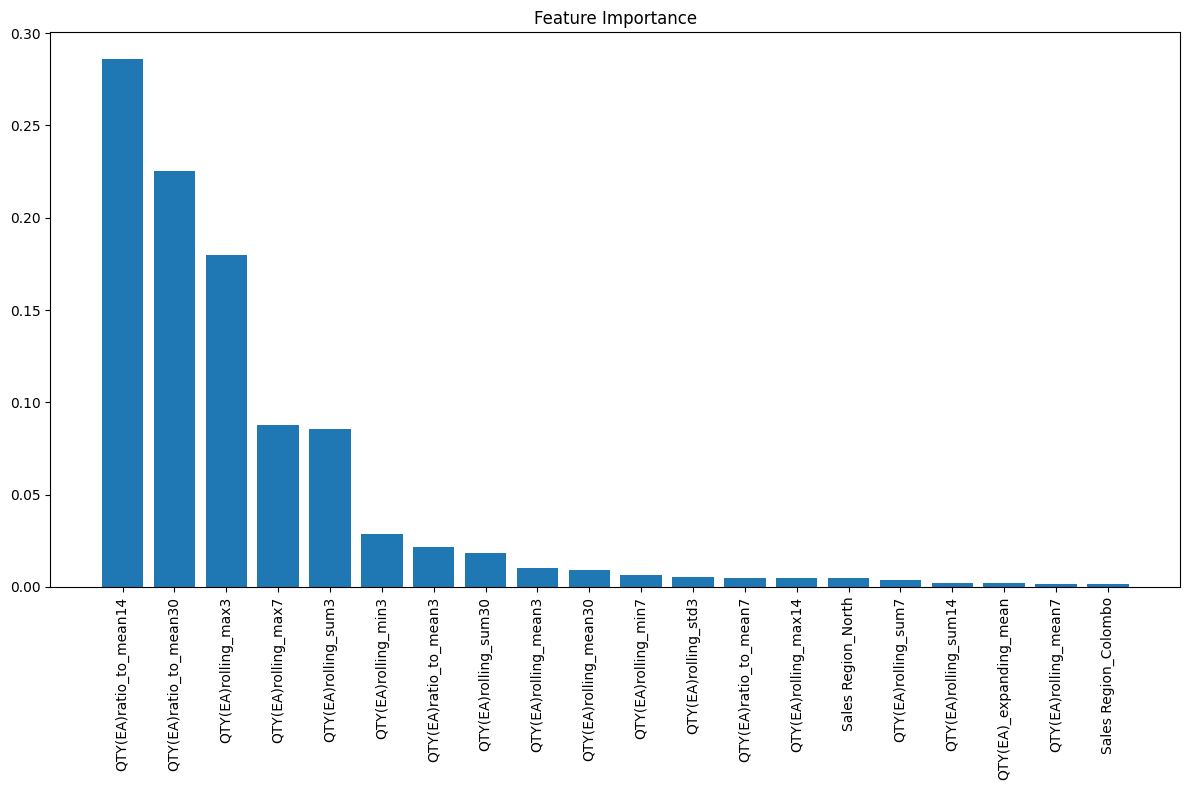


Top Important Features:
1. QTY(EA)ratio_to_mean14: 0.2861
2. QTY(EA)ratio_to_mean30: 0.2253
3. QTY(EA)rolling_max3: 0.1799
4. QTY(EA)rolling_max7: 0.0877
5. QTY(EA)rolling_sum3: 0.0854
6. QTY(EA)rolling_min3: 0.0285
7. QTY(EA)ratio_to_mean3: 0.0215
8. QTY(EA)rolling_sum30: 0.0185
9. QTY(EA)rolling_mean3: 0.0102
10. QTY(EA)rolling_mean30: 0.0091
11. QTY(EA)rolling_min7: 0.0067
12. QTY(EA)rolling_std3: 0.0054
13. QTY(EA)ratio_to_mean7: 0.0049
14. QTY(EA)rolling_max14: 0.0047
15. Sales Region_North: 0.0046
16. QTY(EA)rolling_sum7: 0.0040
17. QTY(EA)rolling_sum14: 0.0021
18. QTY(EA)_expanding_mean: 0.0019
19. QTY(EA)rolling_mean7: 0.0018
20. Sales Region_Colombo: 0.0016

Tuning XGBoost model with cross-validation...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Hyperparameters:
- colsample_bytree: 0.7934239928173882
- learning_rate: 0.10795105286215086
- max_depth: 7
- min_child_weight: 5
- n_estimators: 88
- reg_alpha: 0.44630432108940077
- reg_lambda: 0.56467381293

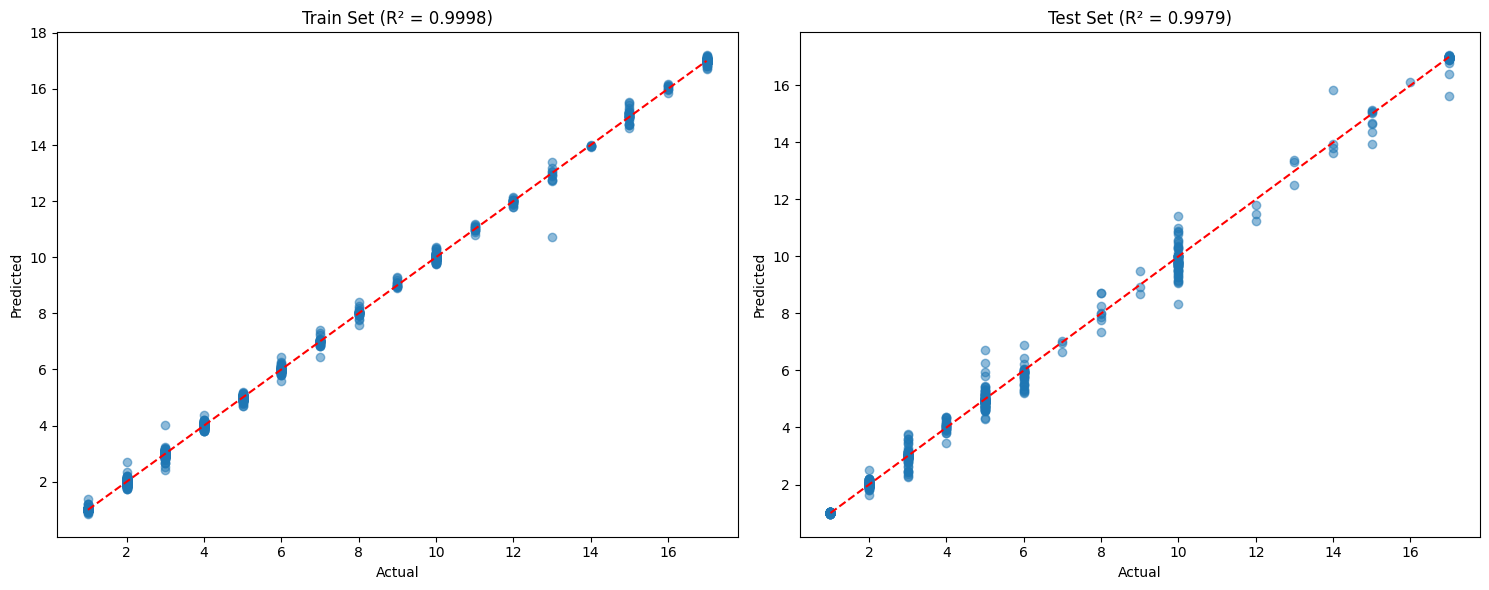

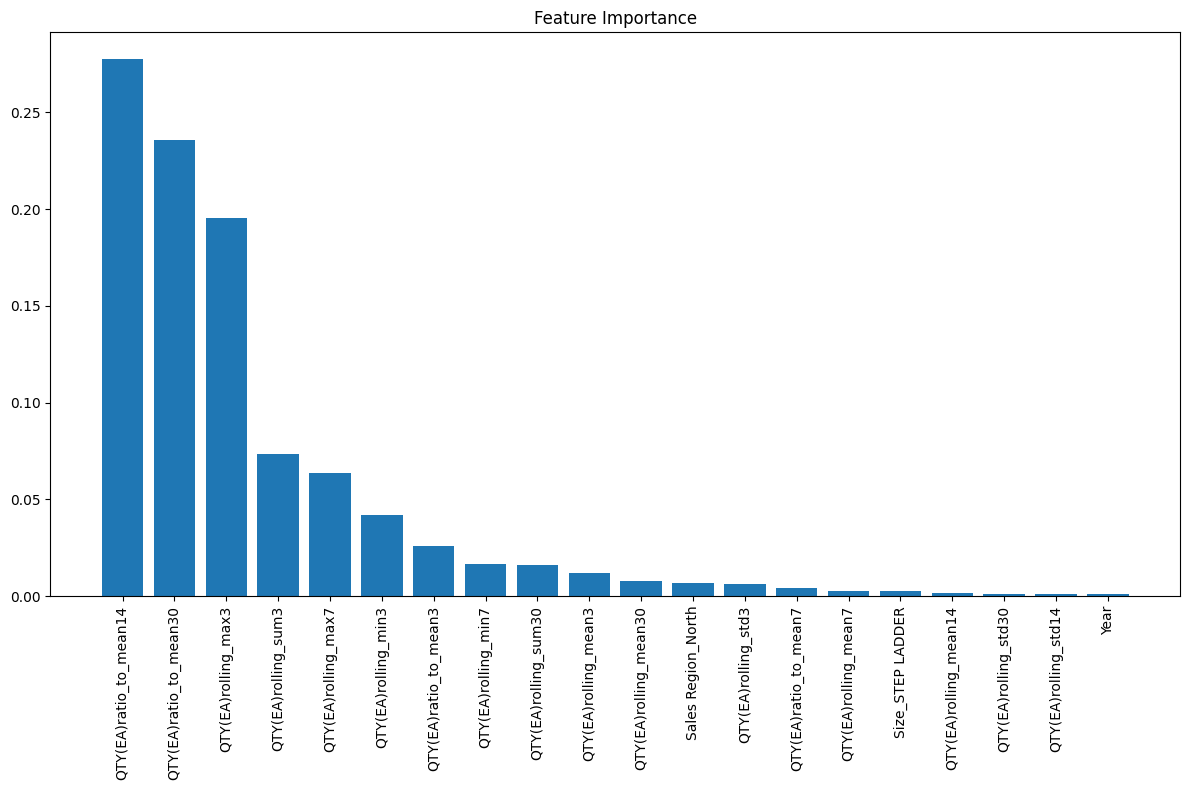


Top Important Features:
1. QTY(EA)ratio_to_mean14: 0.2775
2. QTY(EA)ratio_to_mean30: 0.2359
3. QTY(EA)rolling_max3: 0.1955
4. QTY(EA)rolling_sum3: 0.0734
5. QTY(EA)rolling_max7: 0.0638
6. QTY(EA)rolling_min3: 0.0422
7. QTY(EA)ratio_to_mean3: 0.0260
8. QTY(EA)rolling_min7: 0.0167
9. QTY(EA)rolling_sum30: 0.0159
10. QTY(EA)rolling_mean3: 0.0120
11. QTY(EA)rolling_mean30: 0.0076
12. Sales Region_North: 0.0069
13. QTY(EA)rolling_std3: 0.0060
14. QTY(EA)ratio_to_mean7: 0.0041
15. QTY(EA)rolling_mean7: 0.0026
16. Size_STEP LADDER: 0.0026
17. QTY(EA)rolling_mean14: 0.0015
18. QTY(EA)rolling_std30: 0.0011
19. QTY(EA)rolling_std14: 0.0010
20. Year: 0.0009

Creating ensemble model...

📊 Ensemble Model - Train Set:
✅ MAE: 0.3128 | ✅ RMSE: 0.5819 | ✅ R² Score: 0.9796
--------------------------------------------------
📊 Ensemble Model - Test Set:
✅ MAE: 0.3377 | ✅ RMSE: 0.6105 | ✅ R² Score: 0.9788

Overfitting Assessment:
📉 MAE Test/Train Ratio: 1.08 🟢 Good
📉 RMSE Test/Train Ratio: 1.05 🟢 Good
📉 R

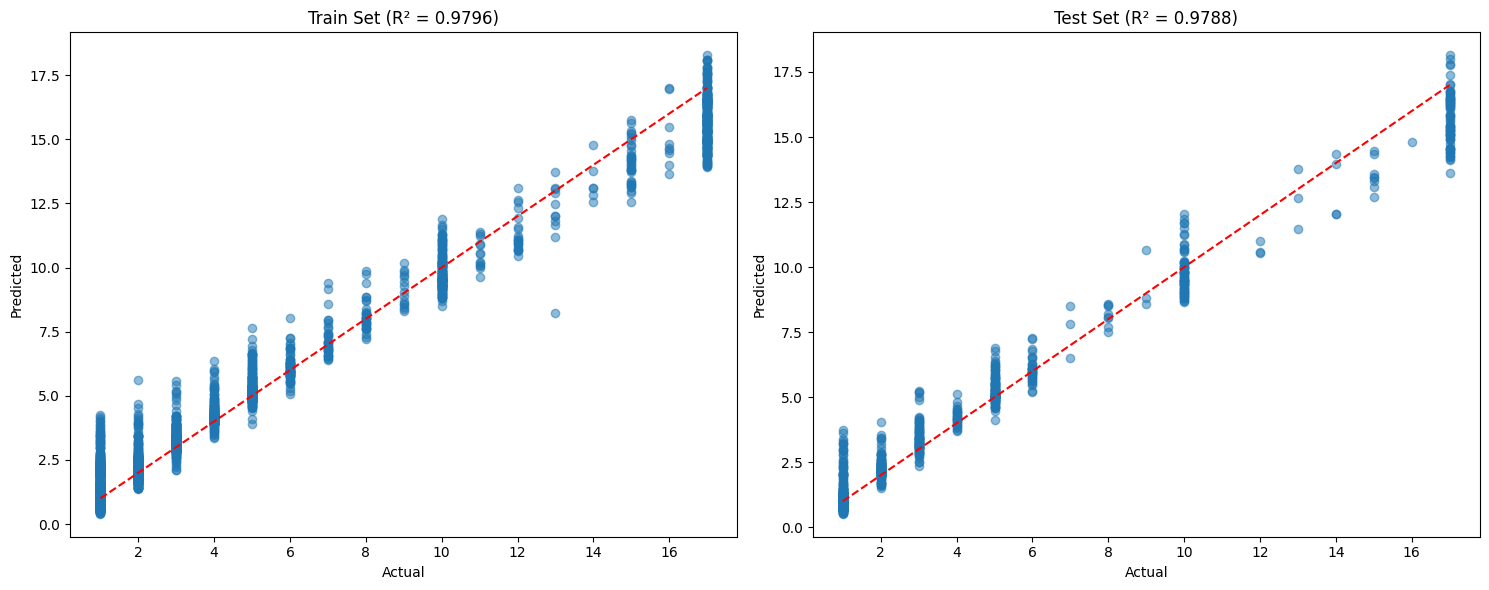

Feature importance not available for this model type.

Generating SHAP explanations...
Using the first XGBoost model from the ensemble for SHAP explanations


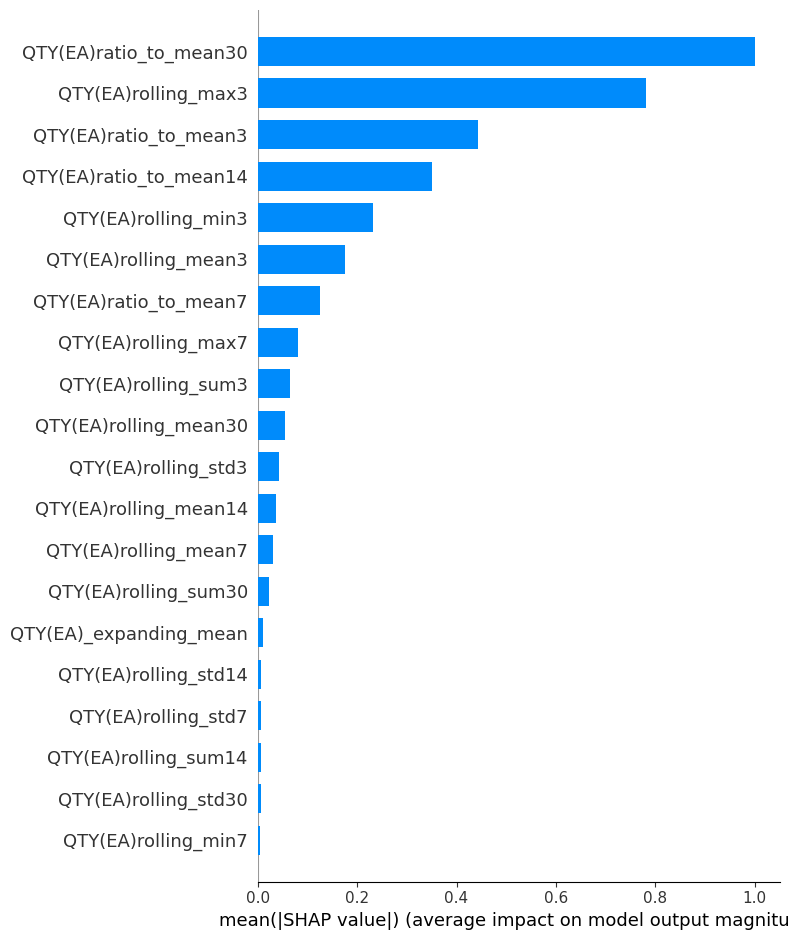

<Figure size 640x480 with 0 Axes>

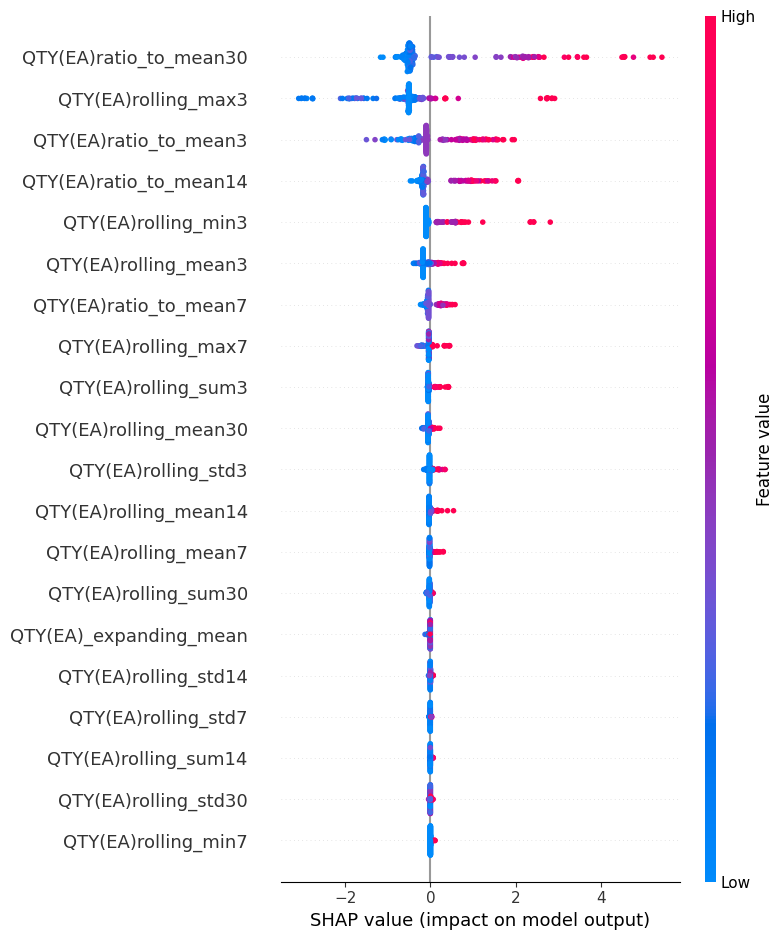

<Figure size 640x480 with 0 Axes>


Model saved to ladder_sales_ensemble_pipeline.joblib

Predicting ladder sales from 2023-03-01 to 2023-04-30 for STEP LADDER in North...
Total predicted ladder sales: 0.70

Generating daily sales forecast from 2025-02-01 to 2025-03-01
For STEP LADDER ladders in Direct region...

Forecast summary (daily):
- Total predicted sales: 64.82
- Average daily sales: 2.24
- Maximum daily sales: 2.33
- Minimum daily sales: 2.16


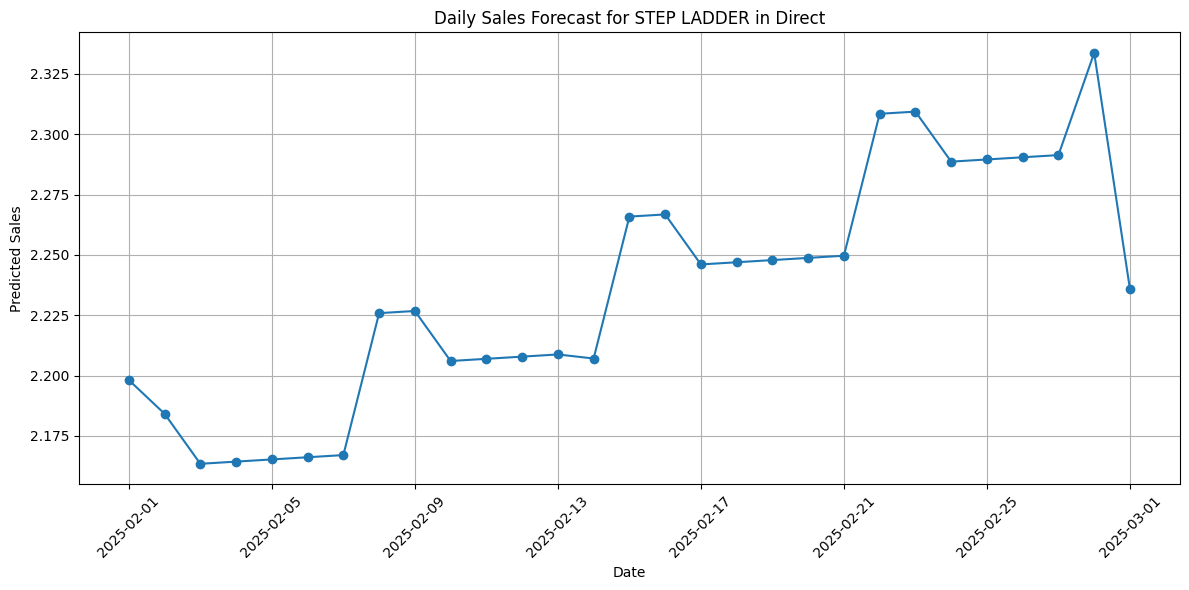


Ladder sales prediction pipeline completed successfully!


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
import xgboost as xgb
from scipy.stats import uniform, randint
import joblib
import shap
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def load_and_preprocess_data(file_path):
    print("Loading data...")
    data = pd.ExcelFile("Ladders updated data.xlsx")
    df = data.parse('Data')

    print(f"\nDataset shape: {df.shape}")
    print("\nMissing values:")
    print(df.isnull().sum())

    df = df.drop(columns=["Net Weight", "Invoice Value"])

    df = df[df['QTY(EA)'] > 0]
    print(f"\nAfter filtering invalid entries, shape: {df.shape}")

    df['Date'] = df['Billing Date']
    df['Year'] = df['Billing Date'].dt.year
    df['Month'] = df['Billing Date'].dt.month
    df['Day'] = df['Billing Date'].dt.day
    df['Weekday'] = df['Billing Date'].dt.weekday
    df['Quarter'] = df['Billing Date'].dt.quarter
    df['DayOfYear'] = df['Billing Date'].dt.dayofyear
    df['WeekOfYear'] = df['Billing Date'].dt.isocalendar().week
    df['IsWeekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
    df['IsMonthStart'] = df['Billing Date'].dt.is_month_start.astype(int)
    df['IsMonthEnd'] = df['Billing Date'].dt.is_month_end.astype(int)
    df['IsQuarterStart'] = df['Billing Date'].dt.is_quarter_start.astype(int)
    df['IsQuarterEnd'] = df['Billing Date'].dt.is_quarter_end.astype(int)

    df = df.drop(columns=["Billing Date"])

    region_mapping = {
        "R1": "North", "R2": "Kandy", "R3": "Kurunagela", "R4": "Southern", "R5": "Negombo",
        "R6": "East", "R7": "Colombo", "R8": "Key Accounts", "PR": "Projects", "PR-EX": "Projects Export",
        "EX": "Exports", "DR": "Direct"
    }
    df["Sales Region"] = df["Sales Region"].replace(region_mapping)

    print("\nAnalyzing outliers in QTY(EA)...")
    analyze_outliers(df, 'QTY(EA)')

    df = handle_outliers(df, 'QTY(EA)')

    return df

def analyze_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Column {column} statistics:")
    print(f"- Mean: {df[column].mean():.2f}")
    print(f"- Median: {df[column].median():.2f}")
    print(f"- Std Dev: {df[column].std():.2f}")
    print(f"- Min: {df[column].min():.2f}")
    print(f"- Max: {df[column].max():.2f}")
    print(f"- IQR: {IQR:.2f}")
    print(f"- Number of outliers: {outliers.shape[0]} ({outliers.shape[0]/df.shape[0]*100:.2f}%)")

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}")
    plt.axvline(x=upper_bound, color='r', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
    plt.axvline(x=lower_bound, color='r', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")

    plt.tight_layout()
    plt.show()

    return outliers

def handle_outliers(df, column, method='winsorize'):
    print(f"\nHandling outliers in {column} using {method} method...")

    if method == 'cap':
        upper_limit = df[column].quantile(0.95)
        df_clean = df.copy()
        df_clean[column] = df_clean[column].clip(upper=upper_limit)
        print(f"Capped values above {upper_limit:.2f}")

    elif method == 'winsorize':
        lower_limit = df[column].quantile(0.05)
        upper_limit = df[column].quantile(0.95)
        df_clean = df.copy()
        df_clean[column] = df_clean[column].clip(lower=lower_limit, upper=upper_limit)
        print(f"Winsorized values below {lower_limit:.2f} and above {upper_limit:.2f}")

    elif method == 'log_transform':
        df_clean = df.copy()
        df_clean[f'{column}_log'] = np.log1p(df_clean[column])
        print(f"Applied log transformation to {column}")

    else:
        df_clean = df.copy()
        print("No outlier treatment applied")

    plt.figure(figsize=(10, 5))
    sns.histplot(df_clean[column], bins=30, kde=True)
    plt.title(f"Distribution of {column} after handling outliers")
    plt.show()

    return df_clean

def encode_categorical_features(df):
    print("\nEncoding categorical features...")

    material_freq = df['Material Code'].value_counts(normalize=True).to_dict()
    df['Material_Code_Freq'] = df['Material Code'].map(material_freq)

    df_encoded = pd.get_dummies(df, columns=["Sales Region", "Size"], drop_first=False)

    df_encoded = df_encoded.drop(columns=["Material Code"])

    return df_encoded

def engineer_features(df):
    print("\nEngineering advanced features...")

    df = df.sort_values(by='Date')

    df['QTY(EA)_lag1'] = df['QTY(EA)'].shift(1)
    df['QTY(EA)_lag7'] = df['QTY(EA)'].shift(7)
    df['QTY(EA)_lag14'] = df['QTY(EA)'].shift(14)
    df['QTY(EA)_lag30'] = df['QTY(EA)'].shift(30)

    windows = [3, 7, 14, 30]
    stats = ['mean', 'std', 'min', 'max', 'median', 'sum']

    for window in windows:
        df[f'QTY(EA)rolling_mean{window}'] = df['QTY(EA)'].rolling(window=window).mean()
        df[f'QTY(EA)rolling_std{window}'] = df['QTY(EA)'].rolling(window=window).std()
        df[f'QTY(EA)rolling_min{window}'] = df['QTY(EA)'].rolling(window=window).min()
        df[f'QTY(EA)rolling_max{window}'] = df['QTY(EA)'].rolling(window=window).max()
        df[f'QTY(EA)rolling_sum{window}'] = df['QTY(EA)'].rolling(window=window).sum()

        df[f'QTY(EA)ratio_to_mean{window}'] = df['QTY(EA)'] / df[f'QTY(EA)rolling_mean{window}']

    df['QTY(EA)_expanding_mean'] = df['QTY(EA)'].expanding().mean()
    df['QTY(EA)_expanding_std'] = df['QTY(EA)'].expanding().std()

    df['month_day_ratio'] = df['Day'] / df.groupby(['Year', 'Month'])['Day'].transform('max')
    df['quarter_progress'] = (df['Month'] % 3) / 3 + (df['Day']) / (3 * df.groupby(['Year', 'Quarter'])['Day'].transform('max'))

    df['season'] = df['Month'].apply(lambda x: 1 if x in [12, 1, 2] else
                                           2 if x in [3, 4, 5] else
                                           3 if x in [6, 7, 8] else
                                           4)

    df['weekday_season'] = df['Weekday'] * df['season']
    df['month_size_interaction'] = df['Month'] * df.filter(like='Size_').sum(axis=1)

    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')

    for col in df.columns:
        if df[col].isna().any():
            df[col] = df[col].fillna(df[col].median() if df[col].dtype.kind in 'iufc' else df[col].mode()[0])

    return df

def feature_selection(df, target='QTY(EA)', correlation_threshold=0.8):
    print("\nPerforming feature selection...")

    target_correlations = df.corr()[target].sort_values(ascending=False)
    print("\nTop correlations with target:")
    print(target_correlations.head(10))

    high_corr_features = target_correlations[abs(target_correlations) > correlation_threshold].index.tolist()
    if target in high_corr_features:
        high_corr_features.remove(target)

    print(f"\nFeatures with correlation > {correlation_threshold} with target:")
    print(high_corr_features)

    if high_corr_features:
        correlation_matrix = df[high_corr_features].corr()

        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix of High Correlation Features')
        plt.tight_layout()
        plt.show()

    feature_correlations = df.drop(columns=[target]).corr()
    high_correlation_pairs = []

    for i in range(len(feature_correlations.columns)):
        for j in range(i+1, len(feature_correlations.columns)):
            if abs(feature_correlations.iloc[i, j]) > correlation_threshold:
                high_correlation_pairs.append((
                    feature_correlations.columns[i],
                    feature_correlations.columns[j],
                    feature_correlations.iloc[i, j]
                ))

    print(f"\nFound {len(high_correlation_pairs)} pairs of highly correlated features (r > {correlation_threshold}):")
    for feat1, feat2, corr in high_correlation_pairs[:10]:
        print(f"- {feat1} and {feat2}: {corr:.3f}")

    if len(high_correlation_pairs) > 10:
        print(f"... and {len(high_correlation_pairs) - 10} more pairs")

    return high_correlation_pairs

def prepare_data_for_training(df, target='QTY(EA)', test_size=0.2, time_based=True):
    print("\nPreparing data for training...")

    X = df.drop(columns=[target, 'Date'])
    y = df[target]

    if time_based:
        train_size = int((1 - test_size) * len(df))
        X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
        y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
        print(f"Using time-based split: train size = {len(X_train)}, test size = {len(X_test)}")
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        print(f"Using random split: train size = {len(X_train)}, test size = {len(X_test)}")

    return X_train, X_test, y_train, y_test

def train_baseline_model(X_train, y_train, X_test, y_test):
    print("\nTraining baseline XGBoost model...")

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42
    )

    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, "Baseline XGBoost")

    return model

def tune_model_with_cv(X_train, y_train, X_test, y_test):
    print("\nTuning XGBoost model with cross-validation...")

    tscv = TimeSeriesSplit(n_splits=5)

    param_dist = {
        'n_estimators': randint(50, 300),
        'max_depth': randint(3, 8),
        'learning_rate': uniform(0.01, 0.1),
        'subsample': uniform(0.7, 0.3),
        'colsample_bytree': uniform(0.7, 0.3),
        'reg_alpha': uniform(0.1, 1.0),
        'reg_lambda': uniform(0.1, 1.0),
        'min_child_weight': randint(1, 10)
    }

    model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=50,
        cv=tscv,
        verbose=1,
        n_jobs=-1,
        scoring='neg_mean_squared_error',
        random_state=42
    )

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    print("\nBest Hyperparameters:")
    for param, value in best_params.items():
        print(f"- {param}: {value}")

    evaluate_model(best_model, X_train, y_train, X_test, y_test, "Tuned XGBoost")

    return best_model

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_metrics = {
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'R²': r2_score(y_train, y_train_pred)
    }

    test_metrics = {
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R²': r2_score(y_test, y_test_pred)
    }

    print(f"\n📊 {model_name} - Train Set:")
    print(f"✅ MAE: {train_metrics['MAE']:.4f} | ✅ RMSE: {train_metrics['RMSE']:.4f} | ✅ R² Score: {train_metrics['R²']:.4f}")
    print("--------------------------------------------------")
    print(f"📊 {model_name} - Test Set:")
    print(f"✅ MAE: {test_metrics['MAE']:.4f} | ✅ RMSE: {test_metrics['RMSE']:.4f} | ✅ R² Score: {test_metrics['R²']:.4f}")

    overfit_ratio = {
        'MAE': test_metrics['MAE'] / train_metrics['MAE'] if train_metrics['MAE'] > 0 else float('inf'),
        'RMSE': test_metrics['RMSE'] / train_metrics['RMSE'] if train_metrics['RMSE'] > 0 else float('inf'),
        'R²': train_metrics['R²'] / test_metrics['R²'] if test_metrics['R²'] > 0 else float('inf')
    }

    print("\nOverfitting Assessment:")
    print(f"📉 MAE Test/Train Ratio: {overfit_ratio['MAE']:.2f} {'🔴 High' if overfit_ratio['MAE'] > 1.3 else '🟢 Good'}")
    print(f"📉 RMSE Test/Train Ratio: {overfit_ratio['RMSE']:.2f} {'🔴 High' if overfit_ratio['RMSE'] > 1.3 else '🟢 Good'}")
    print(f"📉 R² Train/Test Ratio: {overfit_ratio['R²']:.2f} {'🔴 High' if overfit_ratio['R²'] > 1.3 else '🟢 Good'}")

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5)
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Train Set (R² = {train_metrics["R²"]:.4f})')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Test Set (R² = {test_metrics["R²"]:.4f})')

    plt.tight_layout()
    plt.show()

    plot_feature_importance(model, X_train.columns)

    return train_metrics, test_metrics

def plot_feature_importance(model, feature_names, top_n=20):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]

        if len(feature_names) > top_n:
            indices = indices[:top_n]

        plt.figure(figsize=(12, 8))
        plt.title('Feature Importance')
        plt.bar(range(len(indices)), importance[indices], align='center')
        plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()

        print("\nTop Important Features:")
        for i in range(min(top_n, len(indices))):
            print(f"{i+1}. {feature_names[indices[i]]}: {importance[indices[i]]:.4f}")
    else:
        print("Feature importance not available for this model type.")

def explain_model_with_shap(model, X_train, X_test):
    print("\nGenerating SHAP explanations...")

    # Check if the model is a VotingRegressor
    if isinstance(model, VotingRegressor):
        # Extract the first XGBoost model from the ensemble to explain
        # Assuming the first model ('xgb1') is an XGBoost model
        print("Using the first XGBoost model from the ensemble for SHAP explanations")
        xgb_model = model.estimators_[0]  # This gets the first model in the ensemble
        explainer = shap.TreeExplainer(xgb_model)
    else:
        # For direct tree-based models like XGBoost
        explainer = shap.TreeExplainer(model)

    sample_size = min(200, X_test.shape[0])
    shap_values = explainer.shap_values(X_test.iloc[:sample_size])

    plt.figure(figsize=(12, 10))
    shap.summary_plot(shap_values, X_test.iloc[:sample_size], plot_type="bar")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 10))
    shap.summary_plot(shap_values, X_test.iloc[:sample_size])
    plt.tight_layout()
    plt.show()

    return explainer, shap_values

def create_ensemble_model(X_train, y_train, X_test, y_test):
    print("\nCreating ensemble model...")

    xgb_1 = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=1.0,
        random_state=42
    )

    xgb_2 = xgb.XGBRegressor(
        n_estimators=150,
        max_depth=5,
        learning_rate=0.03,
        subsample=0.7,
        colsample_bytree=0.7,
        reg_alpha=0.3,
        reg_lambda=0.8,
        random_state=24
    )

    ridge = Ridge(alpha=1.0, random_state=42)
    elastic = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)

    voting_model = VotingRegressor(
        estimators=[
            ('xgb1', xgb_1),
            ('xgb2', xgb_2),
            ('ridge', ridge),
            ('elastic', elastic)
        ]
    )

    voting_model.fit(X_train, y_train)

    evaluate_model(voting_model, X_train, y_train, X_test, y_test, "Ensemble Model")

    return voting_model

def create_prediction_pipeline(model):
    prediction_pipeline = Pipeline([
        ('model', model)
    ])

    return prediction_pipeline

def save_model(model, filename="xgboost_ladder_sales_model.joblib"):
    joblib.dump(model, filename)
    print(f"\nModel saved to {filename}")

def predict_ladder_sales(model, df, start_date, end_date, size, region):

    print(f"\nPredicting ladder sales from {start_date} to {end_date} for {size} in {region}...")

    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    date_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    if date_filtered.empty:
        print("No data available for the specified date range")
        return 0

    size_col = f"Size_{size}"
    region_col = f"Sales Region_{region}"

    if size_col in df.columns and region_col in df.columns:
        filtered_data = date_filtered[(date_filtered[size_col] == 1) & (date_filtered[region_col] == 1)]

        if filtered_data.empty:
            print(f"No data available for {size} in {region} for the specified date range")
            return 0

        X_pred = filtered_data.drop(columns=['QTY(EA)', 'Date'])

        predictions = model.predict(X_pred)

        total_predicted_sales = np.sum(predictions)

        print(f"Total predicted ladder sales: {total_predicted_sales:.2f}")
        return total_predicted_sales
    else:
        print(f"Size '{size}' or region '{region}' not found in the dataset")
        return 0

def generate_sales_forecast(model, df, forecast_start_date, forecast_end_date, size, region,
                           granularity='daily'):

    print(f"\nGenerating {granularity} sales forecast from {forecast_start_date} to {forecast_end_date}")
    print(f"For {size} ladders in {region} region...")

    start_date = pd.to_datetime(forecast_start_date)
    end_date = pd.to_datetime(forecast_end_date)

    if granularity == 'daily':
        date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    elif granularity == 'weekly':
        date_range = pd.date_range(start=start_date, end=end_date, freq='W')
    elif granularity == 'monthly':
        date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
    else:
        raise ValueError("Granularity must be 'daily', 'weekly', or 'monthly'")

    forecast_df = pd.DataFrame(index=date_range)
    forecast_df.index.name = 'Date'
    forecast_df['predicted_sales'] = 0

    size_col = f"Size_{size}"
    region_col = f"Sales Region_{region}"

    if size_col not in df.columns or region_col not in df.columns:
        print(f"Size '{size}' or region '{region}' not found in the dataset")
        return forecast_df

    for date in date_range:
        sample = df.iloc[0:1].copy()

        for col in df.columns:
            if col.startswith('Size_') or col.startswith('Sales Region_'):
                sample[col] = 0

        sample[size_col] = 1
        sample[region_col] = 1

        sample['Date'] = date
        sample['Year'] = date.year
        sample['Month'] = date.month
        sample['Day'] = date.day
        sample['Weekday'] = date.weekday()
        sample['Quarter'] = date.quarter
        sample['DayOfYear'] = date.dayofyear
        sample['WeekOfYear'] = date.isocalendar()[1]
        sample['IsWeekend'] = 1 if date.weekday() >= 5 else 0
        sample['IsMonthStart'] = 1 if date.is_month_start else 0
        sample['IsMonthEnd'] = 1 if date.is_month_end else 0
        sample['IsQuarterStart'] = 1 if date.is_quarter_start else 0
        sample['IsQuarterEnd'] = 1 if date.is_quarter_end else 0

        sample['season'] = sample['Month'].apply(lambda x: 1 if x in [12, 1, 2] else
                                                 2 if x in [3, 4, 5] else
                                                 3 if x in [6, 7, 8] else 4)

        sample['weekday_season'] = sample['Weekday'] * sample['season']
        sample['month_size_interaction'] = sample['Month'] * sample[size_col]

        for col in df.columns:
            if ('lag' in col or 'rolling' in col or 'expanding' in col) and col in sample.columns:
                sample[col] = df[col].median()

        X_pred = sample.drop(columns=['QTY(EA)', 'Date'])

        missing_cols = set(df.columns) - set(sample.columns)
        for col in missing_cols:
            if col != 'QTY(EA)' and col != 'Date':
                sample[col] = df[col].median() if df[col].dtype.kind in 'iufc' else df[col].mode()[0]

        prediction = model.predict(X_pred)[0]

        forecast_df.loc[date, 'predicted_sales'] = prediction

    if granularity == 'weekly':
        forecast_df = forecast_df.resample('W').sum()
    elif granularity == 'monthly':
        forecast_df = forecast_df.resample('MS').sum()

    print(f"\nForecast summary ({granularity}):")
    print(f"- Total predicted sales: {forecast_df['predicted_sales'].sum():.2f}")
    print(f"- Average {granularity} sales: {forecast_df['predicted_sales'].mean():.2f}")
    print(f"- Maximum {granularity} sales: {forecast_df['predicted_sales'].max():.2f}")
    print(f"- Minimum {granularity} sales: {forecast_df['predicted_sales'].min():.2f}")

    plt.figure(figsize=(12, 6))
    plt.plot(forecast_df.index, forecast_df['predicted_sales'], marker='o')
    plt.title(f'{granularity.capitalize()} Sales Forecast for {size} in {region}')
    plt.xlabel('Date')
    plt.ylabel('Predicted Sales')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return forecast_df

def main():
    file_path = 'ladder_sales_data.xlsx'

    df = load_and_preprocess_data(file_path)

    df_encoded = encode_categorical_features(df)

    df_engineered = engineer_features(df_encoded)

    high_corr_pairs = feature_selection(df_engineered)

    X_train, X_test, y_train, y_test = prepare_data_for_training(df_engineered, time_based=True)

    baseline_model = train_baseline_model(X_train, y_train, X_test, y_test)

    tuned_model = tune_model_with_cv(X_train, y_train, X_test, y_test)

    # Create the ensemble model
    ensemble_model = create_ensemble_model(X_train, y_train, X_test, y_test)

    # Explain the ensemble model with SHAP (instead of the tuned model)
    explain_model_with_shap(ensemble_model, X_train, X_test)

    # Create pipeline with the ensemble model (instead of the tuned model)
    pipeline = create_prediction_pipeline(ensemble_model)

    # Save the ensemble model pipeline
    save_model(pipeline, "ladder_sales_ensemble_pipeline.joblib")

    # Use the ensemble model pipeline for predictions
    predict_ladder_sales(
        pipeline,
        df_engineered,
        start_date='2023-03-01',
        end_date='2023-04-30',
        size='STEP LADDER',
        region='North'
    )

    # Use the ensemble model pipeline for forecasting
    generate_sales_forecast(
        pipeline,
        df_engineered,
        forecast_start_date='2025-02-01',
        forecast_end_date='2025-03-01',
        size='STEP LADDER',
        region='Direct',
        granularity='daily'
    )

    print("\nLadder sales prediction pipeline completed successfully!")
if __name__ == "__main__":
    # Execute main function
    main()